<a href="https://colab.research.google.com/github/BenSmithGreyGroup/navani/blob/main/Detailed_colab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to process echem data

## Quick introduction to colab

Colab is a collaborative ipython notebook set up by google. It runs on google servers, and can be shared, commented and edited in a similar manner to a google doc.

**Uploading data**

There are three main ways to upload your data to colab:


1.   Manually upload using the file browser
2.   Link your google drive
3.   Download from your google drive using pydrive (more complicated)






### 1. File Browser ###


Navigate to the file browser in the left tab, click on it and the notebook will connect to a runtime.

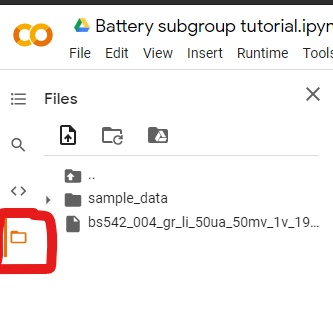

Then click the upload file button, select the file you wish to upload and click open.

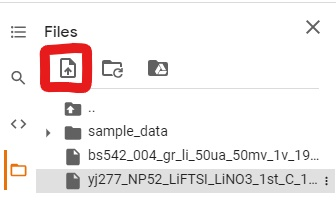

A new file will then appear in the file browser

### 2. Mounting your drive

In the file broswer click the mount google drive button

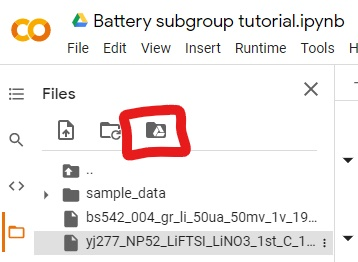

This mounts your drive to the colab session - allowing you to read and write straight to your google drive

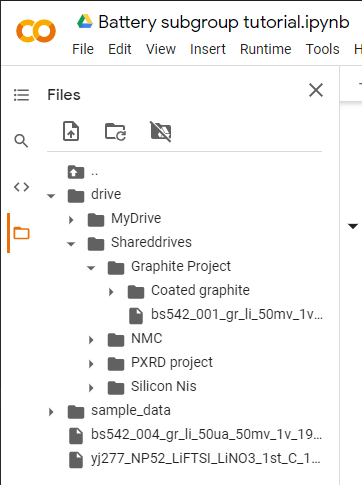

You can also run the below code to mount your drive - you can then name your drive directory whatever you like

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 3. Pydrive

If you want to access files that are very large repeatedly, it can be faster to upload them straight to your colab - rather than having to download them from drive each time

Installing pydrive

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Adding a file from your google drive - here you need to replace the id string with the correct id string for the file from your drive. Get this by clicking get shareable link, and copying the string after id= in the link.

In [ ]:
fileId = drive.CreateFile({'id': '1yGTitLisJLnmtp8a0t-SvMfcMl3NIZlH'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('Bio_csv.zip')  # Save Drive file as a local file

Bio_processed_040918.zip


Unzipping files using bash - useful for uploading many files then extracting to a folder

In [ ]:
!unzip -d Csv_files/ Bio_csv.zip

## Saving data from colab

You can either write fiels directly to your drive, using your mounted google drive. Or you can manually download them from the file browser, by right clicking on the file, and selecting download.

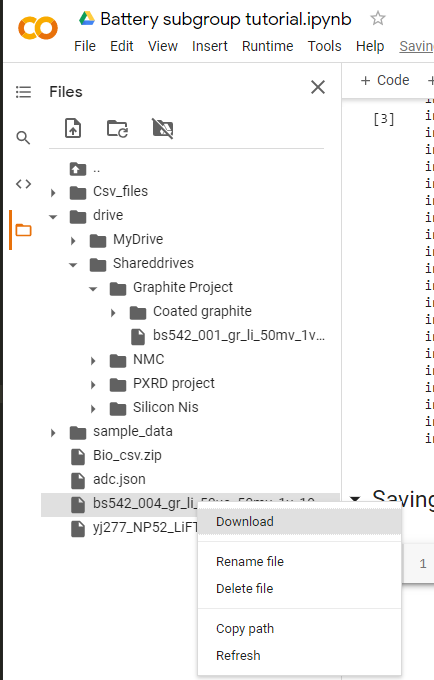

# Using python

## Loading in echem data

You can also now use navani locally on your computer!

Install using:


```
pip install git+https://github.com/BenSmithGreyGroup/navani
```

If you use conda and not pip, you can use conda to install pip and git!


```
conda install pip
conda install -c anaconda git
pip install git+https://github.com/BenSmithGreyGroup/navani
```



In [2]:
!apt install mdbtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
mdbtools is already the newest version (0.7.1-6).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [3]:
!pip install git+https://github.com/BenSmithGreyGroup/navani

  Cloning https://github.com/BenSmithGreyGroup/navani to /tmp/pip-req-build-3l4p3bm6
  Running command git clone -q https://github.com/BenSmithGreyGroup/navani /tmp/pip-req-build-3l4p3bm6
  Created wheel for navani: filename=navani-0.1.1-cp36-none-any.whl size=6986 sha256=be23e1f25e698329da420a9910b2fab249023b262f4965274e84bd63f2b32453
  Stored in directory: /tmp/pip-ephem-wheel-cache-kvcz9bv6/wheels/d6/2e/60/176af722f016072714ce6b004e36e03effb58b17277b4cb51c
Successfully built navani


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from navani import echem as ec

**Biologic .mpr files**

In [5]:
df = ec.echem_file_loader('/content/cc2084_20201124_LCO_test_13p8_C07.mpr')

In [6]:
df.head()

flags  Ns  time/s  dQ/mA.h  ...  Current  state  Capacity  full cycle
0     19   0     0.0      0.0  ...      0.0      R       0.0         1.0
1     19   0     1.0      0.0  ...      0.0      R       0.0         1.0
2     19   0     2.0      0.0  ...      0.0      R       0.0         1.0
3     19   0     3.0      0.0  ...      0.0      R       0.0         1.0
4     19   0     4.0      0.0  ...      0.0      R       0.0         1.0

[5 rows x 20 columns]

## Easy plotting using in-built functions (and dQ/dV)

Plotting charge and discharge with discrete cycles - note the cycles you supply are full cycle numbers

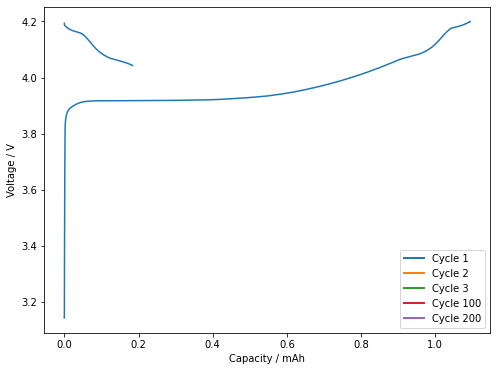

In [7]:
fig, ax = ec.charge_discharge_plot(df, full_cycle=[1, 2, 3, 100, 200])
fig.set_size_inches(8, 6)
# ax.legend(loc='upper right')

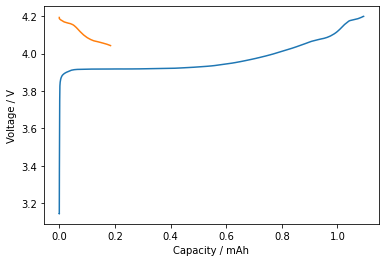

In [8]:
fig, ax = ec.charge_discharge_plot(df, 1)

In [9]:
df = ec.echem_file_loader('/content/ExportData.xlsx')

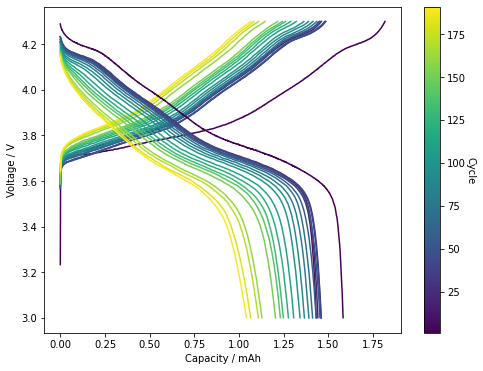

In [10]:
cycles1 = [i for i in range(1, 401, 20)]
cycles2 = [i for i in range(2, 402, 20)]
cycles = cycles1 + cycles2
fig, ax = ec.multi_cycle_plot(df, cycles=cycles)
fig.set_size_inches(8, 6)

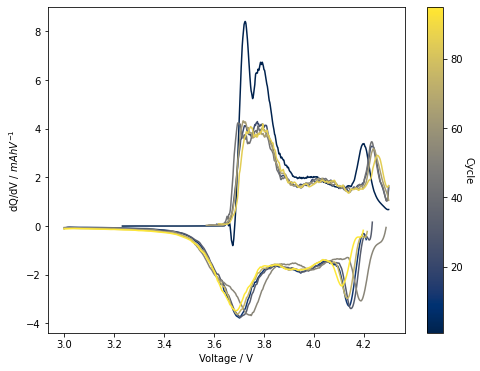

In [11]:
fig, ax = ec.multi_dqdv_plot(df, cycles=range(1, 201, 21),
                    colormap='cividis',
                    window_size_1=101,
                    polyorder_1=5,
                    s_spline=1e-5,
                    window_size_2=1001,
                    polyorder_2=5,
                    final_smooth=True)

fig.set_size_inches(8, 6)
# ax.set_ylim(-5, 1.5)
# ax.set_xlim(0, 1)

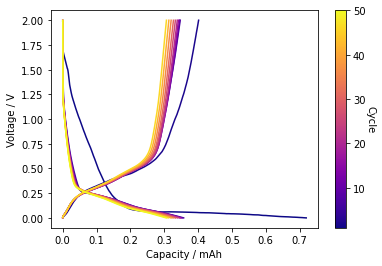

In [ ]:
yan_df = ec.echem_file_loader('/content/yj277_NP52_LiFTSI_LiNO3_1st_C_100_2nd_C_10_C11.mpr')

fig, ax = ec.multi_cycle_plot(yan_df, 
                              cycles=[1, 3, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 100], 
                              colormap='plasma')

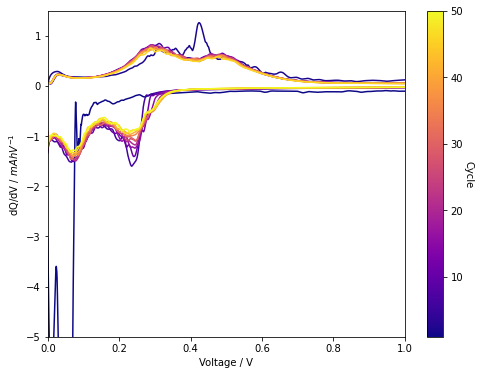

In [ ]:
yan_df = ec.echem_file_loader('/content/yj277_NP52_LiFTSI_LiNO3_1st_C_100_2nd_C_10_C11.mpr')

fig, ax = ec.multi_dqdv_plot(yan_df, cycles=[1, 3, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 100],
                    colormap='plasma',
                    window_size_1=51,
                    polyorder_1=5,
                    s_spline=1e-7,
                    window_size_2=251,
                    polyorder_2=5,
                    final_smooth=True)

fig.set_size_inches(8, 6)
ax.set_ylim(-5, 1.5)
ax.set_xlim(0, 1)

fig.savefig('Yanting_dQdV.pdf', dpi=220)
df.to_csv('yj277_NP52_LiFTSI_LiNO3_1st_C_100_2nd_C_10_C11.csv')

## This calculates some statistics by full cycle number - e.g capacity and CE

In [12]:
summary_df = ec.cycle_summary(df)

In [13]:
summary_df

Current/mA     UCV  ...  Charge Capacity        CE
full cycle                      ...                           
0.0           0.000000  3.1712  ...              NaN       NaN
1.0          -0.034809  4.3000  ...           1.5816  0.870973
2.0           0.000191  4.3000  ...           1.5961  1.000000
3.0          -0.063792  4.3000  ...           1.4572  0.911719
4.0          -0.111740  4.3000  ...           1.4563  0.997261
...                ...     ...  ...              ...       ...
249.0        -0.186016  4.3000  ...           0.7934  0.975412
250.0        -0.190128  4.3000  ...           0.7907  0.986402
251.0        -0.188050  4.3000  ...           0.7843  0.983078
252.0        -0.046249  4.3000  ...           1.4299  1.284495
253.0         0.079212  3.9521  ...              NaN       NaN

[254 rows x 6 columns]

Text(0.5, 0, 'Full cycle')

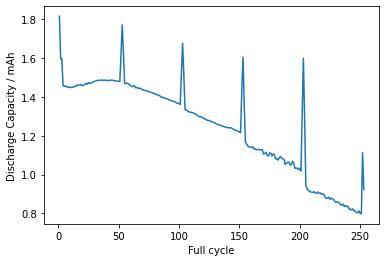

In [15]:
plt.plot(summary_df['Discharge Capacity'])
plt.ylabel('Discharge Capacity / mAh')
plt.xlabel('Full cycle')

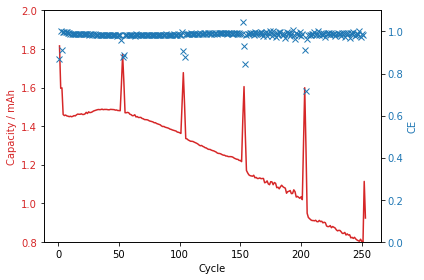

In [16]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Capacity / mAh', color=color)
ax1.plot(summary_df['Discharge Capacity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.8, 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CE', color=color)  # we already handled the x-label with ax1
ax2.plot(summary_df['CE'], color=color, linestyle='', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

### Manually getting summary stats using groupby

Text(0.5, 0, 'Cycle')

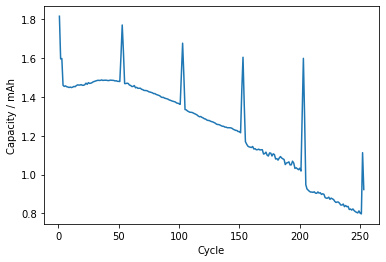

In [ ]:
discharge_caps = df.groupby('half cycle')['Capacity'].max()[1::2].values
half_cycles = df.groupby('half cycle')['Capacity'].max()[1::2].index
full_cycles = np.ceil(half_cycles/2)
plt.plot(full_cycles, discharge_caps)
plt.ylabel('Capacity / mAh')
plt.xlabel('Cycle')

In [ ]:
discharge_caps = df.groupby('half cycle')['Capacity'].max()[1::2]
charge_caps = df.groupby('half cycle')['Capacity'].max()[2::2]

Text(0.5, 0, 'Cycle')

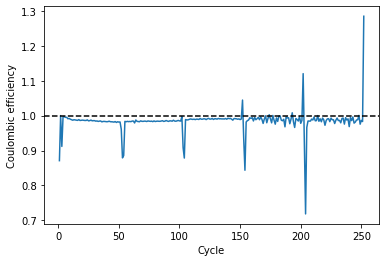

In [ ]:
plt.plot(np.ceil(discharge_caps[:-1].index/2), charge_caps.values/discharge_caps[:-1])
plt.axhline(1, color='black', linestyle='dashed')
plt.ylabel('Coulombic efficiency')
plt.xlabel('Cycle')

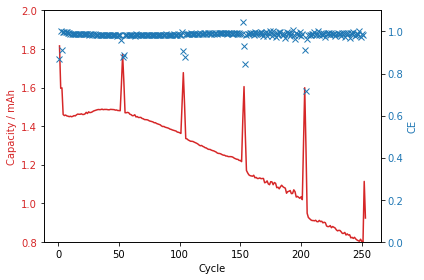

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Capacity / mAh', color=color)
ax1.plot(full_cycles, discharge_caps, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.8, 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CE', color=color)  # we already handled the x-label with ax1
ax2.plot(np.ceil(discharge_caps[:-1].index/2), charge_caps.values/discharge_caps[:-1], color=color, linestyle='', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

## dQ/dV more detailed

Text(0, 0.5, 'Voltage / V')

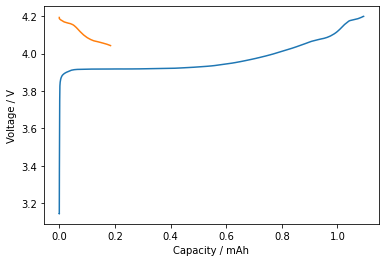

In [ ]:
bio_df = ec.echem_file_loader('/content/cc2084_20201124_LCO_test_13p8_C07.mpr')

for cycle in bio_df['half cycle'].unique():
    mask = bio_df['half cycle'] == cycle
    plt.plot(bio_df['Capacity'][mask], bio_df['Voltage'][mask])

plt.xlabel('Capacity / mAh')
plt.ylabel('Voltage / V')

In [ ]:
voltage_range = [3.8, 4.2]
plot_dict = {}
check_dict = {}
cycles = [1, 2]
for cycle in cycles:
    print(cycle)
    cycle_dict = {}
    df_cycle = bio_df[bio_df['half cycle'] == cycle]
    mask_max = df_cycle['Voltage'] < max(voltage_range)
    mask_min = df_cycle['Voltage'] > min(voltage_range)
    df_cycle = df_cycle[mask_max & mask_min]
    if len(df_cycle) < 50:
        pass

    voltage, dqdv, cap = ec.dqdv_single_cycle(df_cycle['Capacity'], 
                                df_cycle['Voltage'], 
                                window_size_1=3,
                                polyorder_1=1,
                                s_spline=0.0,
                                window_size_2=151,
                                polyorder_2=5,
                                final_smooth=True)
    
    cycle_dict['Voltage'] = voltage
    cycle_dict['dqdv'] = dqdv
    cycle_dict['Capacity'] = cap
    cycle_dict['Raw Voltage'] = df_cycle['Voltage']
    cycle_dict['Raw Capacity'] = df_cycle['Capacity']
    plot_dict.update({cycle:cycle_dict})

1
2


(0.0, 1.5)

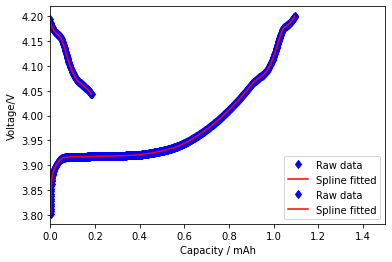

In [ ]:
for cycle in cycles:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'bd', label='Raw data')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r', label='Spline fitted')
    
plt.legend()
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
plt.xlim(0, 1.5)

(3.916, 3.924)

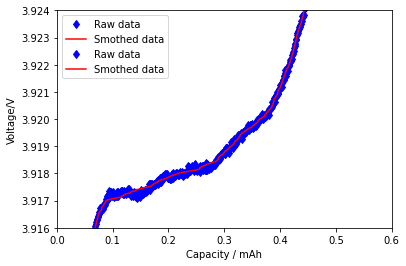

In [ ]:
for cycle in cycles:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'bd', label='Raw data')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r', label='Smothed data')
    
plt.legend()
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
plt.xlim(0, 0.6)
plt.ylim(3.916, 3.924)

(3.916, 3.918)

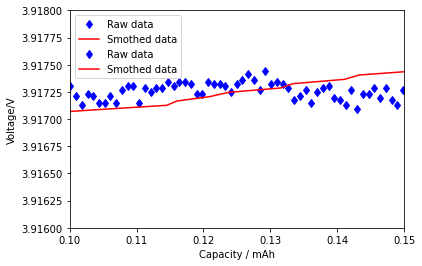

In [ ]:
for cycle in cycles:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'bd', label='Raw data')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r', label='Smothed data')
    
plt.legend()
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
plt.xlim(0.1, 0.15)
plt.ylim(3.916, 3.918)

Text(0, 0.5, 'dQdV / mAh/V')

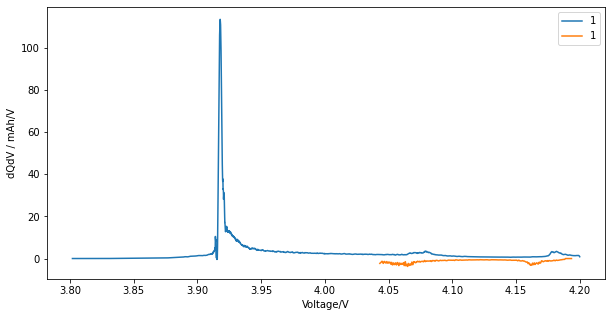

In [ ]:
plt.figure(figsize=(10,5))
for cycle in cycles:
    if cycle == 1:
        mask = plot_dict[1]['dqdv'] > 0
        plt.plot(plot_dict[cycle]['Voltage'], plot_dict[cycle]['dqdv'], label=int((cycle+1)/2))
    else:
        plt.plot(plot_dict[cycle]['Voltage'], plot_dict[cycle]['dqdv'], label=int((cycle+1)/2))
    
# plt.ylim(-20.0, 40)
plt.legend()
plt.xlabel('Voltage/V')
plt.ylabel('dQdV / mAh/V')

Comapring the dQ/dV to that of the biologic script

In [ ]:
man_df = pd.read_csv('/content/Manual export.txt', sep='\t', header=[1])

Text(0, 0.5, 'dQdV / mAh/V')

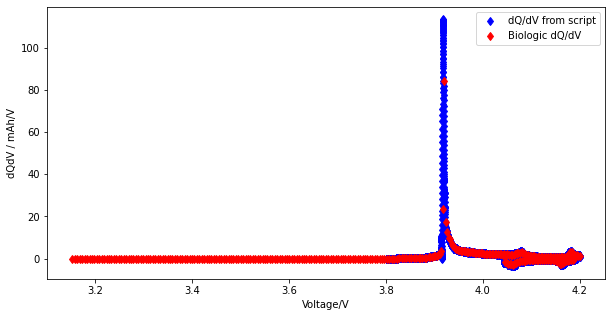

In [ ]:
plt.figure(figsize=(10,5))
for cycle in [1, 2]:
    if cycle == 1:
        mask = plot_dict[1]['dqdv'] > 0
        plt.plot(plot_dict[cycle]['Voltage'][mask], plot_dict[cycle]['dqdv'][mask], 'bd', label='dQ/dV from script')
    else:
        plt.plot(plot_dict[cycle]['Voltage'], plot_dict[cycle]['dqdv'], 'bd')
    
plt.plot(man_df['Ewe/V'], man_df['d(Q-Qo)/dE/mA.h/V'], 'rd', label='Biologic dQ/dV')

# plt.ylim(-20.0, 40)
# plt.xlim(4, 4.2)
# plt.ylim(-5, 6)
plt.legend()
plt.xlabel('Voltage/V')
plt.ylabel('dQdV / mAh/V')

Text(0, 0.5, 'dQdV / mAh/V')

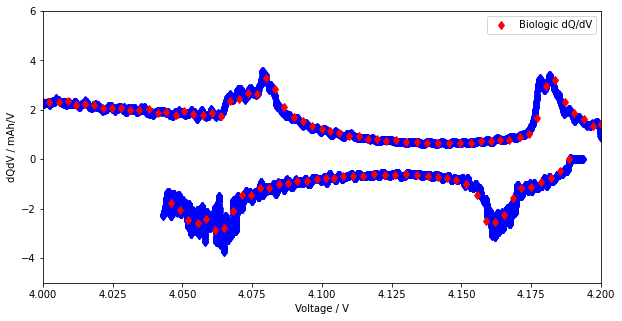

In [ ]:
plt.figure(figsize=(10,5))
for cycle in [1, 2]:
    plt.plot(plot_dict[cycle]['Voltage'], plot_dict[cycle]['dqdv'], 'b-d',)
    
plt.plot(man_df['Ewe/V'], man_df['d(Q-Qo)/dE/mA.h/V'], 'rd', label='Biologic dQ/dV')

plt.ylim(-20.0, 40)
plt.xlim(4, 4.2)
plt.ylim(-5, 6)
plt.legend()
plt.xlabel('Voltage / V')
plt.ylabel('dQdV / mAh/V')


### dQ/dV of land data

Numerical differentiation

Text(0.5, 0, 'Capacity / mAh')

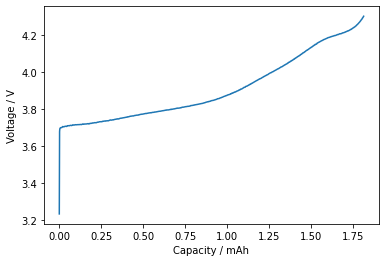

In [ ]:
cycle = 1
mask = df['half cycle'] == cycle
capacity = df.loc[mask, 'Capacity']
voltage = df.loc[mask, 'Voltage']
plt.plot(capacity, voltage)
plt.ylabel('Voltage / V')
plt.xlabel('Capacity / mAh')

Below is the dQ/dV plot. You can see it is messy, and disgusting and for charge, with voltage increasing the dQ/dV should entirely be postive, this isn't the case because of the noisy data.

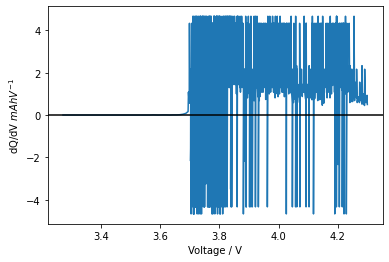

In [ ]:
dV = np.diff(voltage)
dQ = np.diff(capacity)

mask = dV != 0
plt.plot(voltage[1:][mask], dQ[mask]/dV[mask])
plt.ylabel('dQ/dV $mAhV^{-1}$')
plt.xlabel('Voltage / V')
plt.axhline(0, color='k', linestyle='-')

In [ ]:
df[df['half cycle'] == 1]

1    Index    TestTime  StepTime  ... half cycle Voltage Capacity
1447  1443  1-00:00:05  00:00:00  ...          1  3.2329        0
1448  1444  1-00:00:11  00:00:06  ...          1  3.2713   0.0001
1449  1445  1-00:00:12  00:00:07  ...          1  3.3079   0.0002
1450  1446  1-00:00:14  00:00:09  ...          1  3.3398   0.0002
1451  1447  1-00:00:15  00:00:10  ...          1  3.3681   0.0002
...    ...         ...       ...  ...        ...     ...      ...
2842  2838  1-22:50:58  22:50:53  ...          1  4.2932   1.8114
2843  2839  1-22:51:58  22:51:53  ...          1  4.2953   1.8127
2844  2840  1-22:52:58  22:52:53  ...          1  4.2975    1.814
2845  2841  1-22:53:58  22:53:53  ...          1   4.299   1.8154
2846  2842  1-22:54:22  22:54:17  ...          1     4.3   1.8159

[1400 rows x 16 columns]

In [ ]:
from scipy.interpolate import splrep, splev
from scipy.signal import savgol_filter

voltage_range = [3.5, 4.3]
plot_dict = {}
check_dict = {}

for cycle in [1, 2, 3, 4, 5, 6]:
    cycle_dict = {}
    df_cycle = df[df['half cycle'] == cycle]
    mask_max = df_cycle['Voltage'] < max(voltage_range)
    mask_min = df_cycle['Voltage'] > min(voltage_range)
    df_cycle = df_cycle[mask_max & mask_min]
    if len(df_cycle) < 50:
        pass
    
    # df_cycle = df_cycle.groupby('Voltage', as_index=False)['Capacity'].mean()
    # df_cycle = df_cycle.groupby('Capacity', as_index=False)['Voltage'].mean()

    voltage, smoothed_dqdv, cap = ec.dqdv_single_cycle(df_cycle['Capacity'], 
                                                      df_cycle['Voltage'], 
                                                      window_size_1=151,
                                                      polyorder_1=5,
                                                      s_spline=1e-6,
                                                      window_size_2=701,
                                                      polyorder_2=5,
                                                      final_smooth=True)

    cycle_dict['Voltage'] = voltage
    cycle_dict['Capacity'] = cap
    # cycle_dict['dqdv'] = dqdv
    cycle_dict['Smoothed dqdv'] = smoothed_dqdv
    cycle_dict['Raw Voltage'] = df_cycle['Voltage/V']
    cycle_dict['Raw Capacity'] = df_cycle['Capacity/mAh']
    plot_dict.update({cycle:cycle_dict})

Text(0.5, 0, 'Capacity / mAh')

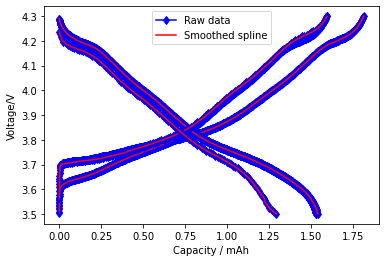

In [ ]:
for cycle in [1, 2, 3, 4, 5, 6]:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'b-d')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r')
    
from matplotlib.lines import Line2D
lines = [Line2D([0],[0], color='b', marker='d'),
         Line2D([0], [0], color='r')]
plt.legend(lines, ['Raw data', 'Smoothed spline'])
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
# plt.xlim(0, 1.5)

(4.1, 4.3)

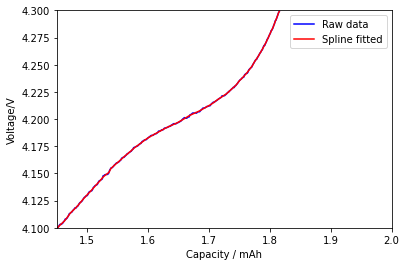

In [ ]:
for cycle in [1]:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'b', label='Raw data')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r', label='Spline fitted')
    
plt.legend()
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
plt.xlim(1.45, 2)
plt.ylim(4.1, 4.3)

(4.195, 4.21)

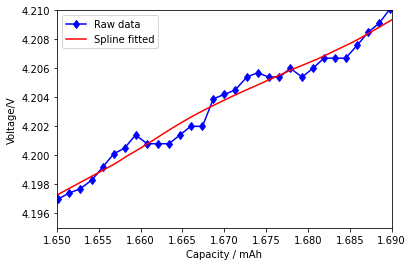

In [ ]:
for cycle in [1]:
    plt.plot(plot_dict[cycle]['Raw Capacity'], plot_dict[cycle]['Raw Voltage'], 'b-d', label='Raw data')
    plt.plot(plot_dict[cycle]['Capacity'], plot_dict[cycle]['Voltage'], 'r', label='Spline fitted')
    
plt.legend()
plt.ylabel('Voltage/V')
plt.xlabel('Capacity / mAh')
plt.xlim(1.65, 1.69)
plt.ylim(4.195, 4.21)

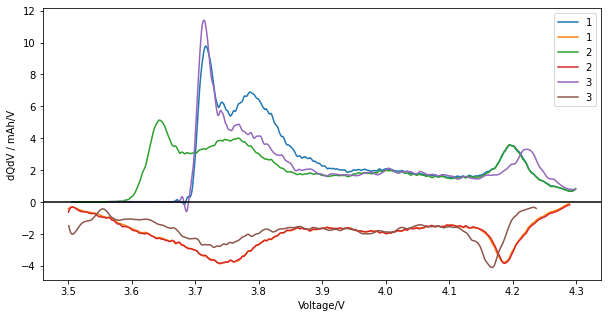

In [ ]:
plt.figure(figsize=(10,5))
for cycle in [1, 2, 3, 4, 5, 6]:
    # plt.plot(plot_dict[cycle]['Voltage'][mask], plot_dict[cycle]['dqdv'][mask], label=int((cycle+1)/2))
    plt.plot(plot_dict[cycle]['Voltage'], plot_dict[cycle]['Smoothed dqdv'], label=int((cycle+1)/2))
    
# plt.ylim(0.0, 100)
plt.legend()
plt.xlabel('Voltage/V')
plt.ylabel('dQdV / mAh/V')
plt.axhline(0, color='black')

## Many cycles

In [ ]:
df = ec.echem_file_loader('/content/yj277_NP52_LiFTSI_LiNO3_1st_C_100_2nd_C_10_C11.mpr')

Text(0, 0.5, 'Voltage / V')

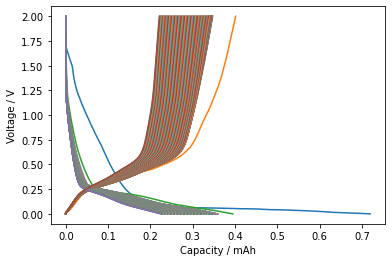

In [ ]:
for cycle in df['half cycle'].unique():
    mask = df['half cycle'] == cycle
    plt.plot(df['Capacity'][mask], df['Voltage'][mask])

plt.xlabel('Capacity / mAh')
plt.ylabel('Voltage / V')

Text(0.5, 0, 'Capacity / mAh')

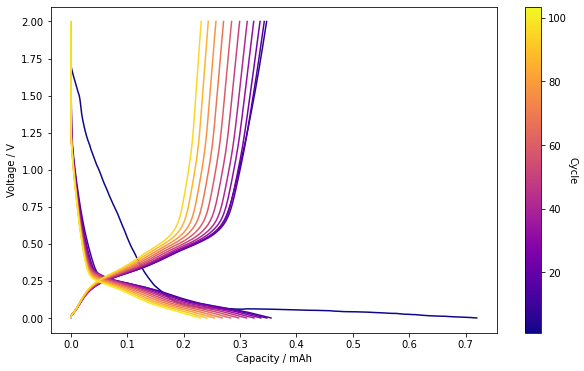

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
cm = plt.get_cmap('plasma')
norm = Normalize(vmin=(min(df['half cycle'])+1)/2, vmax=(max(df['half cycle'])+1)/2)
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
plt.figure(figsize=(10,6))


for cycle in df['half cycle'].unique()[::9]:
    mask = df['half cycle'] == cycle
    plt.plot(df['Capacity'][mask], df['Voltage'][mask], color=cm(norm((cycle+1)/2)))

# fake up the array of the scalar mappable. Urgh...
# sm._A = []

cbar = plt.colorbar(sm)
cbar.set_label('Cycle', rotation=270, labelpad=10)
plt.ylabel('Voltage / V')
plt.xlabel('Capacity / mAh')

In [ ]:
def multi_cycle_plot(df, cycles, colormap='viridis'):
    """
    Supply the cycles as half cycle numbers e.g 1, 2 are discharge and charge for 
    first cycle
    """
    import matplotlib.cm as cm
    from matplotlib.colors import Normalize

    fig, ax = plt.subplots()
    cm = plt.get_cmap(colormap)
    norm = Normalize(vmin=int(np.ceil(min(cycles)/2)), vmax=int(np.ceil(max(cycles)/2)))
    sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)

    for cycle in cycles:
        mask = df['half cycle'] == cycle
        ax.plot(df['Capacity'][mask], df['Voltage'][mask], color=cm(norm(np.ceil(cycle/2))))

    cbar = fig.colorbar(sm)
    cbar.set_label('Cycle', rotation=270, labelpad=10)
    ax.set_ylabel('Voltage / V')
    ax.set_xlabel('Capacity / mAh')
    return fig, ax

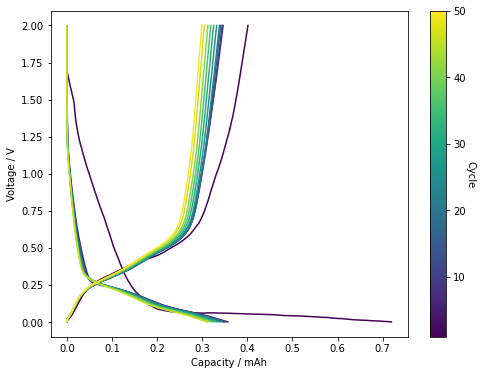

In [ ]:
fig, ax = multi_cycle_plot(df, [1, 2, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 100])
fig.set_size_inches(8, 6)
fig.savefig('Example echem plot.pdf', dpi=220)

(-3.0, 1.5)

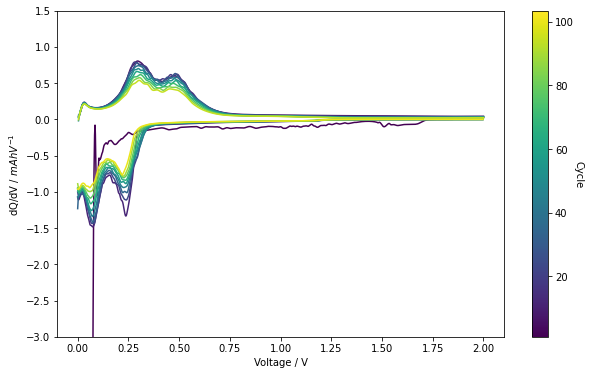

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
cm = plt.get_cmap('viridis')
norm = Normalize(vmin=(min(df['half cycle'])+1)/2, vmax=(max(df['half cycle'])+1)/2)
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
plt.figure(figsize=(10,6))


for cycle in df['half cycle'].unique()[::11]:
    df_cycle = df[df['half cycle'] == cycle]
    voltage, dqdv, cap = ec.dqdv_single_cycle(df_cycle['Capacity'], 
                                df_cycle['Voltage'], 
                                window_size_1=101,
                                polyorder_1=5,
                                s_spline=1e-6,
                                window_size_2=351,
                                polyorder_2=5,
                                final_smooth=True)
    
    plt.plot(voltage, dqdv, color=cm(norm((cycle+1)/2)))

# fake up the array of the scalar mappable. Urgh...
# sm._A = []

cbar = plt.colorbar(sm)
cbar.set_label(f'Cycle', rotation=270, labelpad=10)
plt.ylabel('dQ/dV / $mAhV^{-1}$')
plt.xlabel('Voltage / V')
plt.ylim(-3, 1.5)

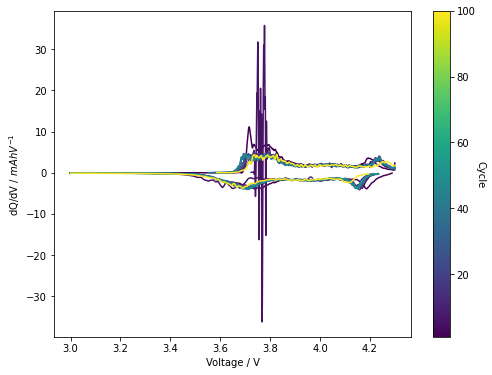

In [ ]:
fig, ax = ec.multi_dqdv_plot(df, [1, 2, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 100, 199, 200],
                          window_size_2=351,
                          polyorder_2=5,
                          final_smooth=True)
fig.set_size_inches(8, 6)
# ax.set_ylim(-2, 1)
fig.savefig('Example dqdv plot.pdf', dpi=220)


## Introduction to pandas

Here we have loaded in a lot of different filetypes into python as a pandas dataframe. Pandas is a great module for processing and manipulating data from many different filetypes. It has built in methods for plotting data also. It is similar to dplyr from the R tidyverse.


It comes with built in functions for reading .txt, .xlsx and .csv files that work really well!


Everything is then built around a DataFrame object, which is what our echem data is currently stored as.


Lets start by looking at how to load in a .txt file from the ivium machine, and then process the data to give capacity, cycle number, the state and the dQ/dV

In [ ]:
df = pd.read_csv('/content/Echem3.txt', sep='\t')
df.head()

time /s  I /mA   E /V
0     10.0  0.334  1.497
1     20.0  0.216  1.497
2     30.0  0.169  1.497
3     40.0  0.141  1.497
4     50.0  0.124  1.497

You select data either as columns or rows, and can specify a column and row to extract a single value

Column

In [ ]:
df['E /V']

0        1.497
1        1.497
2        1.497
3        1.497
4        1.497
         ...  
31240    3.132
31241    3.132
31242    3.131
31243    3.132
31244    3.131
Name: E /V, Length: 31245, dtype: float64

Row

In [ ]:
df.loc[0]

time /s    10.000
I /mA       0.334
E /V        1.497
Name: 0, dtype: float64

Specific values

In [ ]:
df.loc[0, 'E /V']

1.4969999999999999

You can even plot the data of a single column or row very easily in pandas - note when using this plot method, the column values are plotted as the y values, in this case the current. The x-axis is given by the index of the dataframe - for this dataframe you can see this is just an increasing number

Text(0.5, 0, 'Index of data point')

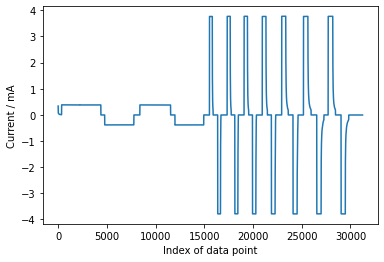

In [ ]:
df['I /mA'].plot()
plt.ylabel('Current / mA')
plt.xlabel('Index of data point')

Plotting two columns aganinst eachother is also very easy! Here we use plt.plot() to plot x against y. The plots look very similar, but now the x value is the time value from the other column.

plt.plot(x, y) is the general form

Text(0.5, 0, 'Time / s')

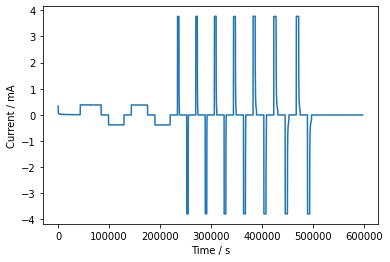

In [ ]:
plt.plot(df['time /s'], df['I /mA'])
plt.ylabel('Current / mA')
plt.xlabel('Time / s')

Getting to capacity

In [ ]:
df.head()

time /s  I /mA   E /V
0     10.0  0.334  1.497
1     20.0  0.216  1.497
2     30.0  0.169  1.497
3     40.0  0.141  1.497
4     50.0  0.124  1.497

It's fairly easy to add new columns, you simply need to give it a label and some values (note the values need to be the same length as the dataframe - when performing functions on other columns of the same dataframe this will always be the case)

In [ ]:
df['dq'] = np.diff(df['time /s'], prepend=0)*df['I /mA']

In [ ]:
df.head()

time /s  I /mA   E /V    dq
0     10.0  0.334  1.497  3.34
1     20.0  0.216  1.497  2.16
2     30.0  0.169  1.497  1.69
3     40.0  0.141  1.497  1.41
4     50.0  0.124  1.497  1.24

np.diff is simply numerical differentiation of an array of values:

$dQ_N = Q_{N+1} - Q_N$

You add prepend=0 to add a zero to the begining of thwe array before doing the numerical differentiation, otherwise you end up with one less value in the resultant dQ.

In [ ]:
np.diff(df['time /s'], prepend=0)

array([10., 10., 10., ..., 10., 10., 10.])

In [ ]:
df['dq sum / mAh'] = df['dq'].cumsum()/3600

In [ ]:
df.head()

time /s  I /mA   E /V    dq  dq sum / mAh
0     10.0  0.334  1.497  3.34      0.000928
1     20.0  0.216  1.497  2.16      0.001528
2     30.0  0.169  1.497  1.69      0.001997
3     40.0  0.141  1.497  1.41      0.002389
4     50.0  0.124  1.497  1.24      0.002733

Text(0.5, 0, 'Capacity / mAh')

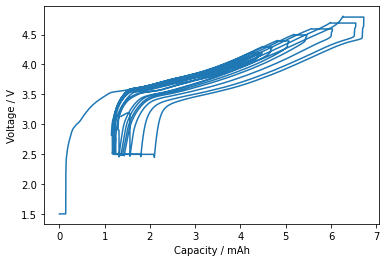

In [ ]:
plt.plot(df['dq sum / mAh'], df['E /V'])
plt.ylabel('Voltage / V')
plt.xlabel('Capacity / mAh')

This isn't the same format that arbin or biologic plot the data - some more complex manipulation is needed.

Here we are defining the state of the battery ox/red by if the current is positive or negative. A simple function says if positive return 0, else return 1.

We then make a new column, 'state' where we map this function we defined onto the current column

In [ ]:
def ivium_state(x):
    if x >=0:
        return 0
    else:
        return 1

df['state'] = df['I /mA'].map(lambda x: ivium_state(x))

In [ ]:
df.head()

time /s  I /mA   E /V    dq  dq sum / mAh  state
0     10.0  0.334  1.497  3.34      0.000928      0
1     20.0  0.216  1.497  2.16      0.001528      0
2     30.0  0.169  1.497  1.69      0.001997      0
3     40.0  0.141  1.497  1.41      0.002389      0
4     50.0  0.124  1.497  1.24      0.002733      0

The next bit again is slightly more involved. Here we are comparing the 'state' column, which is 0 for charge and 1 for discharge. We define a column called 'half cycle' where the value is 0 except for when

$State_N$ is not equal to $State_{N+1}$

Here the value is one. We then cumulatively sum this column to give the half cycles


In [ ]:
 df['half cycle'] = df['state'].ne(df['state'].shift()).cumsum()

In [ ]:
df.head()

time /s  I /mA   E /V    dq  dq sum / mAh  state  half cycle
0     10.0  0.334  1.497  3.34      0.000928      0           1
1     20.0  0.216  1.497  2.16      0.001528      0           1
2     30.0  0.169  1.497  1.69      0.001997      0           1
3     40.0  0.141  1.497  1.41      0.002389      0           1
4     50.0  0.124  1.497  1.24      0.002733      0           1

In [ ]:
for cycle in df['half cycle'].unique():
    mask = df['half cycle'] == cycle
    idx = df.index[mask]
    df.loc[idx, 'Capacity'] = abs(df.loc[idx, 'dq']).cumsum()

Text(0, 0.5, 'Voltage / V')

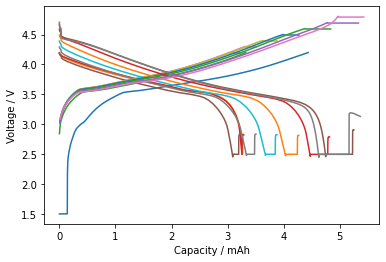

In [ ]:
for cycle in df['half cycle'].unique():
    mask = df['half cycle'] == cycle
    plt.plot(df['Capacity'][mask]/3600, df['E /V'][mask])
plt.xlabel('Capacity / mAh')
plt.ylabel('Voltage / V')

In [ ]:
df_cycle = df[df['half cycle'] == 1]
voltage_range = [1.6, 4]
df_cycle = df_cycle[df_cycle['E /V'] < max(voltage_range)]
df_cycle = df_cycle[df_cycle['E /V'] > min(voltage_range)]
capacity = df_cycle['Capacity']
voltage = df_cycle['E /V']

voltage, dqdv, cap = ec.dqdv_single_cycle(capacity, 
                                voltage, 
                                window_size_1=101,
                                polyorder_1=5,
                                s_spline=1e-6,
                                window_size_2=351,
                                polyorder_2=5,
                                final_smooth=True)

Text(0, 0.5, 'Voltage / V')

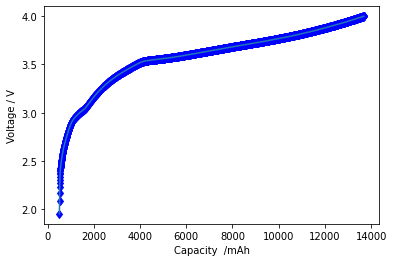

In [ ]:
plt.plot(capacity, df_cycle['E /V'], 'bd')
plt.plot(cap, voltage)
plt.xlabel('Capacity  /mAh')
plt.ylabel('Voltage / V')

Text(0, 0.5, 'dQ/dV / $mAhV^{-1}$')

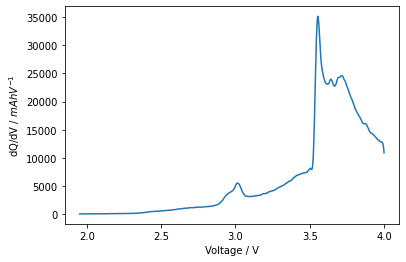

In [ ]:
plt.plot(voltage, dqdv)
plt.xlabel('Voltage / V')
plt.ylabel('dQ/dV / $mAhV^{-1}$')

In [ ]:
df_cycle = df[df['half cycle'] == 2]
voltage_range = [2.85, 4.25]
df_cycle = df_cycle[df_cycle['E /V'] < max(voltage_range)]
df_cycle = df_cycle[df_cycle['E /V'] > min(voltage_range)]
capacity = df_cycle['Capacity']
raw_voltage = df_cycle['E /V']

voltage2, dqdv2, cap2 = ec.dqdv_single_cycle(capacity, 
                                raw_voltage, 
                                window_size_1=101,
                                polyorder_1=5,
                                s_spline=1e-6,
                                window_size_2=151,
                                polyorder_2=5,
                                final_smooth=True)

Text(0, 0.5, 'dQ/dV / $mAhV^{-1}$')

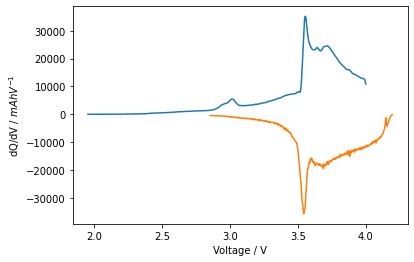

In [ ]:
plt.plot(voltage, dqdv)
plt.plot(voltage2, dqdv2)

plt.xlabel('Voltage / V')
plt.ylabel('dQ/dV / $mAhV^{-1}$')

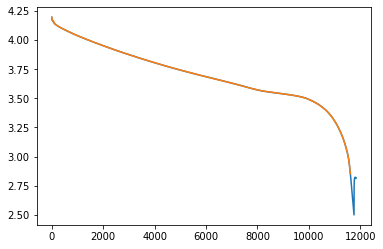

In [ ]:
df_cycle = df[df['half cycle'] == 2]
plt.plot(df_cycle['Capacity'], df_cycle['E /V'])
plt.plot(cap2, voltage2)